# 1-Business and Data Understanding

## General 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings 
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_orj = pd.read_csv("raw_sales_data_final.csv")
df = df_orj.copy()
df["product_title"] = df["product_title"].replace({"Premium Rug Pad": "Plush Rug Pad"})

# top 25 products selected to predict
titles = df.groupby("product_title")["net_quantity"].sum()
top25_titles = titles.sort_values(ascending= False).head(25)
df = df[df["product_title"].isin(top25_titles.index)].reset_index(drop=True)
df.columns = df.columns.str.lower()

# masking product title column
unique_titles = df['product_title'].unique()
mask_dict = {title: f'product_{i+1}' for i, title in enumerate(unique_titles)}
df['product_title'] = df['product_title'].map(mask_dict)
cols = ['product_title'] + [col for col in df.columns if col != 'product_title']
df = df[cols]

df

,product_title,week,net_quantity,sessions,generalproducttype,detailedproducttype,country,material,washability,toptitlecomments,isspecialdate,pile_height,colorvariants (#)
0,product_1,2022-W52,3,9252,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,447,False,flatweave,1
1,product_2,2022-W52,12,9252,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,461,False,medium-pile,6
2,product_3,2022-W52,2,9252,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,447,False,flatweave,1
3,product_4,2022-W52,1,9252,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,60,False,flatweave,6
4,product_5,2022-W52,5,9252,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,70,False,medium-pile,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,product_24,2023-W52,14,149542,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,33,True,medium-pile,4
1118,product_22,2023-W52,20,149542,NOAK Rugs - Washable,NOAK Rugs - IN Washable,IN,wool,machine-washable,28,True,plush,1
1119,product_13,2023-W52,57,149542,NOAK Rugs - Washable,NOAK Rugs - IN Washable,IN,wool,machine-washable,70,True,plush,4
1120,product_11,2023-W52,119,149542,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,227,True,medium-pile,6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_title        1122 non-null   object
 1   week                 1122 non-null   object
 2   net_quantity         1122 non-null   int64 
 3   sessions             1122 non-null   int64 
 4   generalproducttype   1122 non-null   object
 5   detailedproducttype  1122 non-null   object
 6   country              1122 non-null   object
 7   material             1122 non-null   object
 8   washability          1122 non-null   object
 9   toptitlecomments     1122 non-null   int64 
 10  isspecialdate        1122 non-null   bool  
 11  pile_height          1122 non-null   object
 12  colorvariants (#)    1122 non-null   int64 
dtypes: bool(1), int64(4), object(8)
memory usage: 106.4+ KB


## Advanced EDA 

In [11]:
def check_df (data):
    print("---------- SHAPE ----------")
    print(data.shape)
    print("---------- TYPES ----------")
    print(data.dtypes)
    print("---------- HEAD ----------")
    print(data.head(5).to_string())
    print("---------- TAIL ----------")
    print(data.tail(5).to_string())
    print("----------- NA -----------")
    print(data.isnull().sum())
    print("-------- DESCRIBE --------")
    print(data.describe([0, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T.to_string())
    
check_df(df)

---------- SHAPE ----------
(1122, 13)
---------- TYPES ----------
product_title          object
week                   object
net_quantity            int64
sessions                int64
generalproducttype     object
detailedproducttype    object
country                object
material               object
washability            object
toptitlecomments        int64
isspecialdate            bool
pile_height            object
colorvariants (#)       int64
dtype: object
---------- HEAD ----------
  product_title      week  net_quantity  sessions        generalproducttype          detailedproducttype country            material       washability  toptitlecomments  isspecialdate  pile_height  colorvariants (#)
0     product_1  2022-W52             3      9252  NOAK Rugs - Non-Washable  NOAK Rugs - IN Non-Washable      IN                jute      non-washable               447          False    flatweave                  1
1     product_2  2022-W52            12      9252      NOAK Rugs - Was

In [12]:
# Analysis of Categorical Variables
cat_columns = [i for i in df.columns if str(df[i].dtypes) in ["category","bool","object"] ]
cat_columns

['product_title',
 'week',
 'generalproducttype',
 'detailedproducttype',
 'country',
 'material',
 'washability',
 'isspecialdate',
 'pile_height']

--------------------------------PRODUCT_TITLE--------------------------------
               product_title  Ratio
product_title                      
product_1                 53   0.05
product_2                 53   0.05
product_3                 53   0.05
product_4                 53   0.05
product_5                 53   0.05
product_6                 53   0.05
product_7                 53   0.05
product_8                 53   0.05
product_9                 53   0.05
product_10                52   0.05
product_11                51   0.05
product_13                49   0.04
product_12                49   0.04
product_14                48   0.04
product_15                48   0.04
product_16                48   0.04
product_17                48   0.04
product_19                48   0.04
product_18                38   0.03
product_20                37   0.03
product_21                32   0.03
product_22                32   0.03
product_23                22   0.02
product_24            

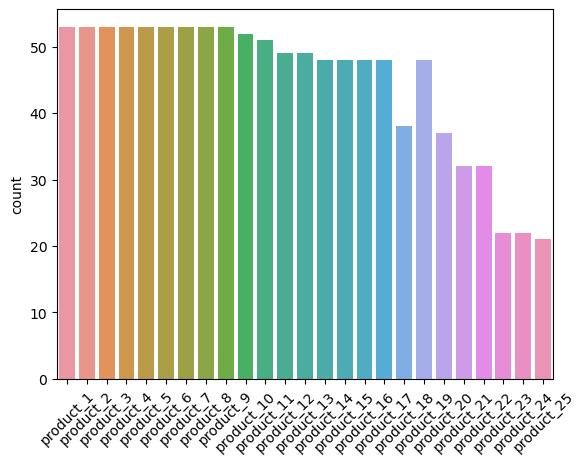

--------------------------------WEEK--------------------------------
          week  Ratio
week                 
2023-W52    25   0.02
2023-W42    25   0.02
2023-W32    25   0.02
2023-W33    25   0.02
2023-W34    25   0.02
2023-W35    25   0.02
2023-W36    25   0.02
2023-W37    25   0.02
2023-W38    25   0.02
2023-W39    25   0.02
2023-W41    25   0.02
2023-W40    25   0.02
2023-W43    25   0.02
2023-W44    25   0.02
2023-W45    25   0.02
2023-W46    25   0.02
2023-W47    25   0.02
2023-W48    25   0.02
2023-W49    25   0.02
2023-W50    25   0.02
2023-W51    25   0.02
2023-W31    24   0.02
2023-W27    22   0.02
2023-W30    22   0.02
2023-W29    22   0.02
2023-W28    22   0.02
2023-W26    22   0.02
2023-W24    22   0.02
2023-W25    22   0.02
2023-W23    21   0.02
2023-W22    21   0.02
2023-W21    21   0.02
2023-W20    20   0.02
2023-W19    20   0.02
2023-W15    19   0.02
2023-W06    19   0.02
2023-W08    19   0.02
2023-W07    19   0.02
2023-W18    19   0.02
2023-W05    19   0.02
2023-W1

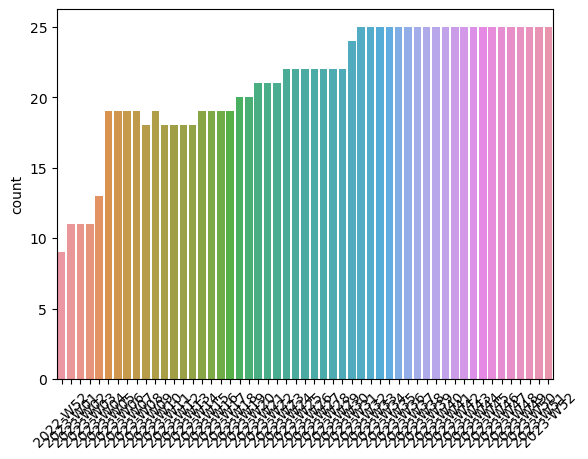

--------------------------------GENERALPRODUCTTYPE--------------------------------
                          generalproducttype  Ratio
generalproducttype                                 
NOAK Rugs - Washable                     858   0.76
NOAK Rugs - Non-Washable                 211   0.19
Rug Pad                                   53   0.05


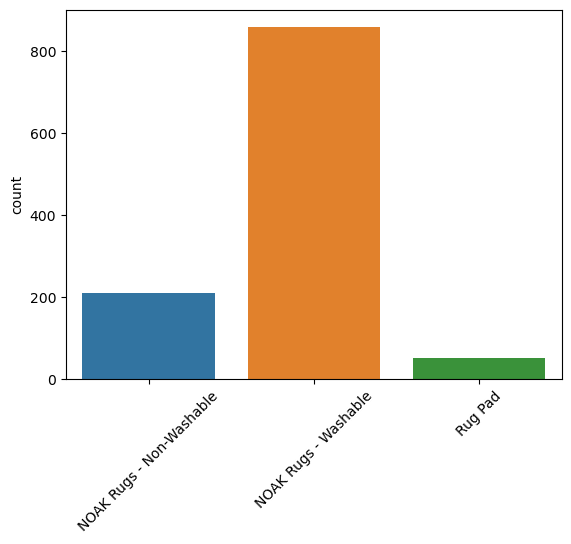

--------------------------------DETAILEDPRODUCTTYPE--------------------------------
                             detailedproducttype  Ratio
detailedproducttype                                    
NOAK Rugs - TR Washable                      648   0.58
NOAK Rugs - IN Non-Washable                  211   0.19
NOAK Rugs - IN Washable                      210   0.19
NOAK Rugs - Rug Pad                           53   0.05


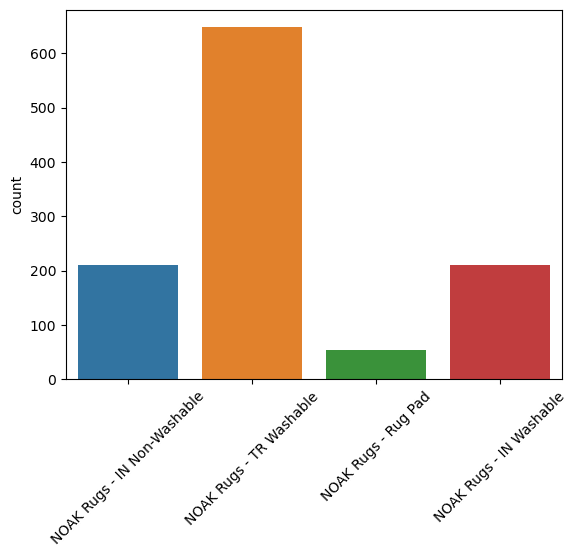

--------------------------------COUNTRY--------------------------------
         country  Ratio
country                
TR           648   0.58
IN           421   0.38
US            53   0.05


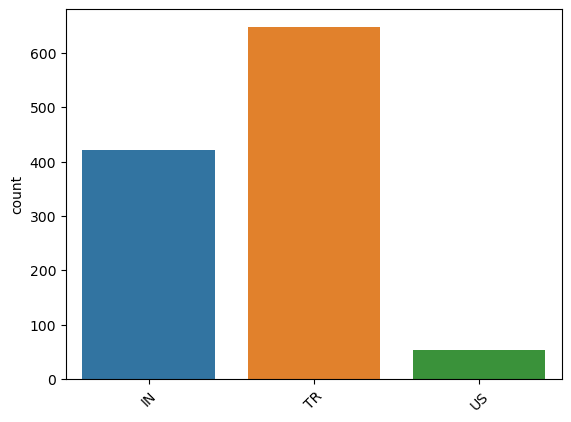

--------------------------------MATERIAL--------------------------------
                    material  Ratio
material                           
recycled-polyester       648   0.58
wool                     262   0.23
jute                     159   0.14
other                     53   0.05


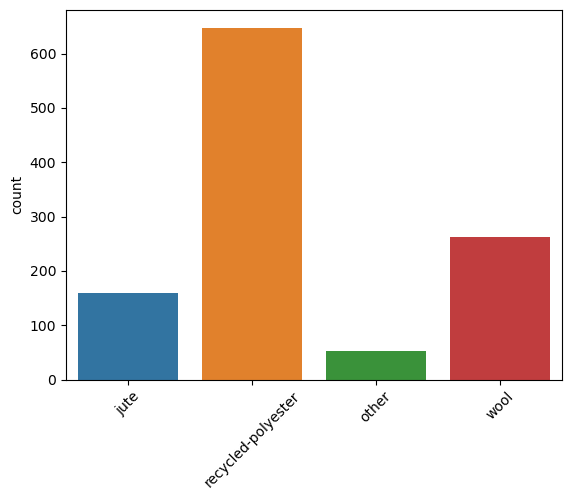

--------------------------------WASHABILITY--------------------------------
                  washability  Ratio
washability                         
machine-washable          858   0.76
non-washable              264   0.24


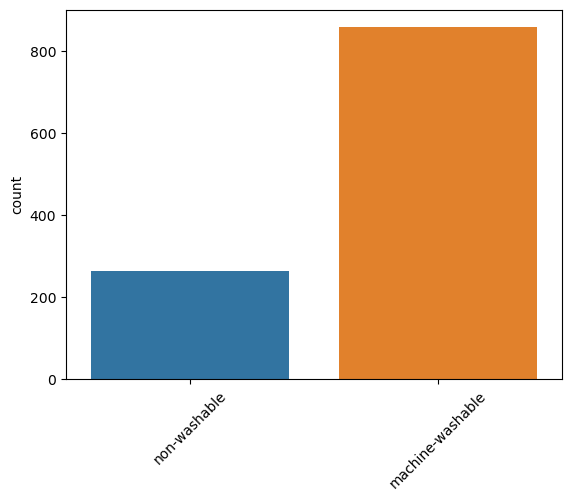

--------------------------------ISSPECIALDATE--------------------------------
               isspecialdate  Ratio
isspecialdate                      
0                        891   0.79
1                        231   0.21


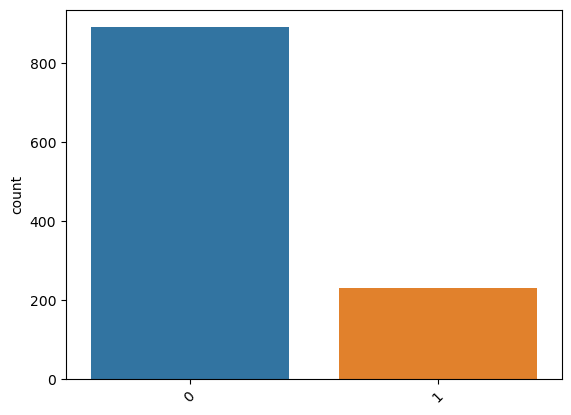

--------------------------------PILE_HEIGHT--------------------------------
             pile_height  Ratio
pile_height                    
medium-pile          700   0.62
plush                210   0.19
flatweave            159   0.14
low-pile              53   0.05


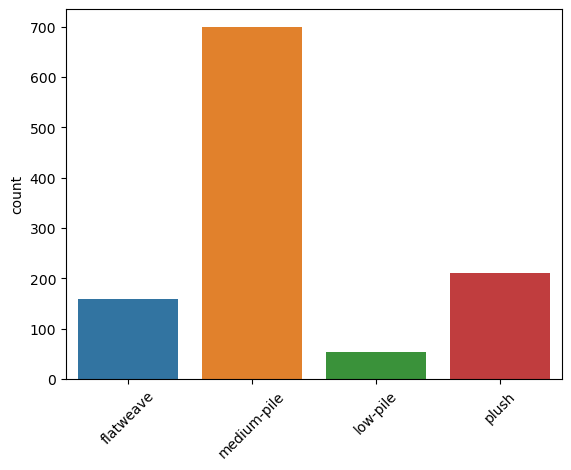

In [13]:
def cat_summary (dataframe, column_name):
    if dataframe[column_name].dtypes == "bool":
        dataframe[column_name] = dataframe[column_name].astype(int)
        
        print(pd.DataFrame(
        {column_name: dataframe[column_name].value_counts(),
         "Ratio": dataframe[column_name].value_counts(1)}))
        sns.countplot(x=dataframe[column_name], data=dataframe)
        plt.xlabel(None)
        plt.xticks(rotation=45)
        plt.show()
        print("=====================================================================")
    else:
        print(pd.DataFrame(
        {column_name: dataframe[column_name].value_counts(),
         "Ratio": dataframe[column_name].value_counts(1)}))
        sns.countplot(x=dataframe[column_name], data=dataframe)
        plt.xlabel(None)
        plt.xticks(rotation=45)
        plt.show()
        print("=====================================================================")
        
for i in cat_columns:
    print("--------------------------------"+i.upper()+"--------------------------------")
    cat_summary (df,i)

In [14]:
# Analysis of Numerical Variables
num_columns = [i for i in df.columns if str(df[i].dtypes) not in ["category","bool","object","datetime64[ns]","timedelta64[ns]"] ] 
num_columns

['net_quantity',
 'sessions',
 'toptitlecomments',
 'isspecialdate',
 'colorvariants (#)']

In [15]:
df[num_columns].describe(percentiles=[0.05, 0.10, 0.25, 0.50, 0.75, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,95%,99%,max
net_quantity,1122.00,46.73,78.93,-1.00,3.05,5.00,11.00,21.00,45.00,177.80,377.44,1055.00
sessions,1122.00,119391.65,34431.26,9252.00,80464.00,84003.00,91568.00,118819.00,131874.00,174564.00,238935.00,238935.00
toptitlecomments,1122.00,140.74,180.05,0.00,0.00,21.00,23.00,60.00,190.00,461.00,611.00,611.00
isspecialdate,1122.00,0.21,0.40,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
colorvariants (#),1122.00,3.38,2.00,1.00,1.00,1.00,1.00,3.00,4.00,6.00,8.00,8.00


--------------------------------NET_QUANTITY--------------------------------
count   1122.00
mean      46.73
std       78.93
min       -1.00
5%         3.05
10%        5.00
25%       11.00
50%       21.00
75%       45.00
95%      177.80
99%      377.44
max     1055.00
Name: net_quantity, dtype: float64


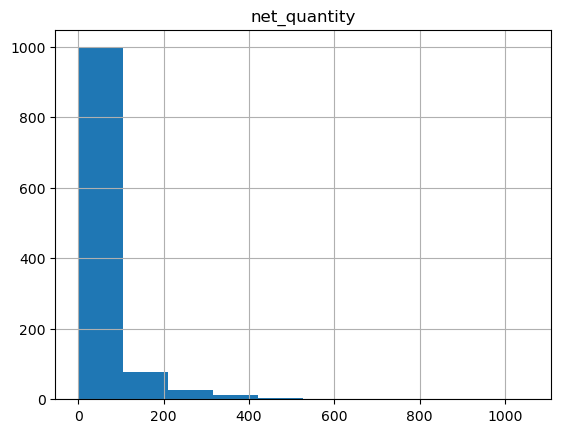

--------------------------------SESSIONS--------------------------------
count     1122.00
mean    119391.65
std      34431.26
min       9252.00
5%       80464.00
10%      84003.00
25%      91568.00
50%     118819.00
75%     131874.00
95%     174564.00
99%     238935.00
max     238935.00
Name: sessions, dtype: float64


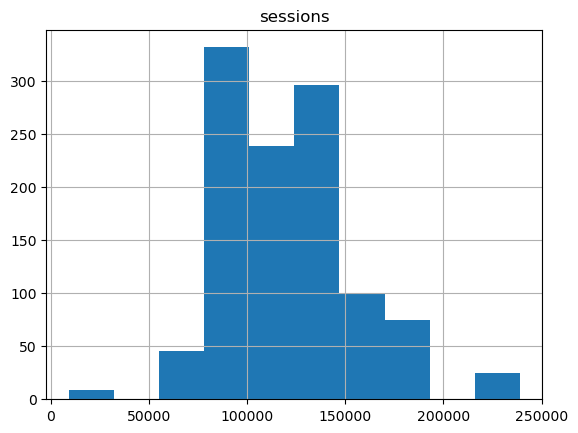

--------------------------------TOPTITLECOMMENTS--------------------------------
count   1122.00
mean     140.74
std      180.05
min        0.00
5%         0.00
10%       21.00
25%       23.00
50%       60.00
75%      190.00
95%      461.00
99%      611.00
max      611.00
Name: toptitlecomments, dtype: float64


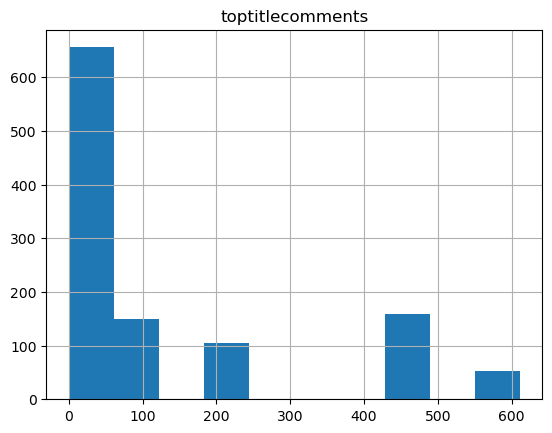

--------------------------------ISSPECIALDATE--------------------------------
count   1122.00
mean       0.21
std        0.40
min        0.00
5%         0.00
10%        0.00
25%        0.00
50%        0.00
75%        0.00
95%        1.00
99%        1.00
max        1.00
Name: isspecialdate, dtype: float64


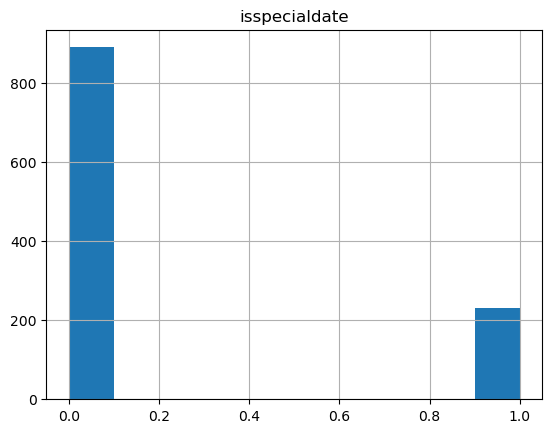

--------------------------------COLORVARIANTS (#)--------------------------------
count   1122.00
mean       3.38
std        2.00
min        1.00
5%         1.00
10%        1.00
25%        1.00
50%        3.00
75%        4.00
95%        6.00
99%        8.00
max        8.00
Name: colorvariants (#), dtype: float64


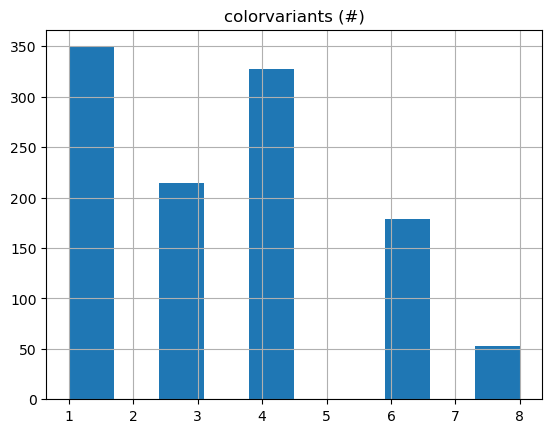

In [16]:
quartiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.95, 0.99]

def num_summary (dataframe, column_name):    
    print(dataframe[column_name].describe(quartiles).T)
    dataframe[column_name].hist()
    plt.xlabel(None)
    plt.title(column_name)
    plt.show()    
    
for i in num_columns:
    print("--------------------------------"+i.upper()+"--------------------------------")
    num_summary(df, i)

# 2-Data Preparation 

## Duplicates

In [17]:
print("Data Rows = ", df.shape[0])
print("Duplicate Rows = ", df.duplicated().sum())
print("Duplicate Rows % = ", df.duplicated().sum()/df.shape[0])
df.drop_duplicates(inplace=True)
print ("After drop_duplicates Data Rows =", df.shape[0])

Data Rows =  1122
Duplicate Rows =  0
Duplicate Rows % =  0.0
After drop_duplicates Data Rows = 1122


## Outliers

* In this dataset, the Z-score method was used for outlier detection. The IQR method or some machine learning models could also be considered as an alternative

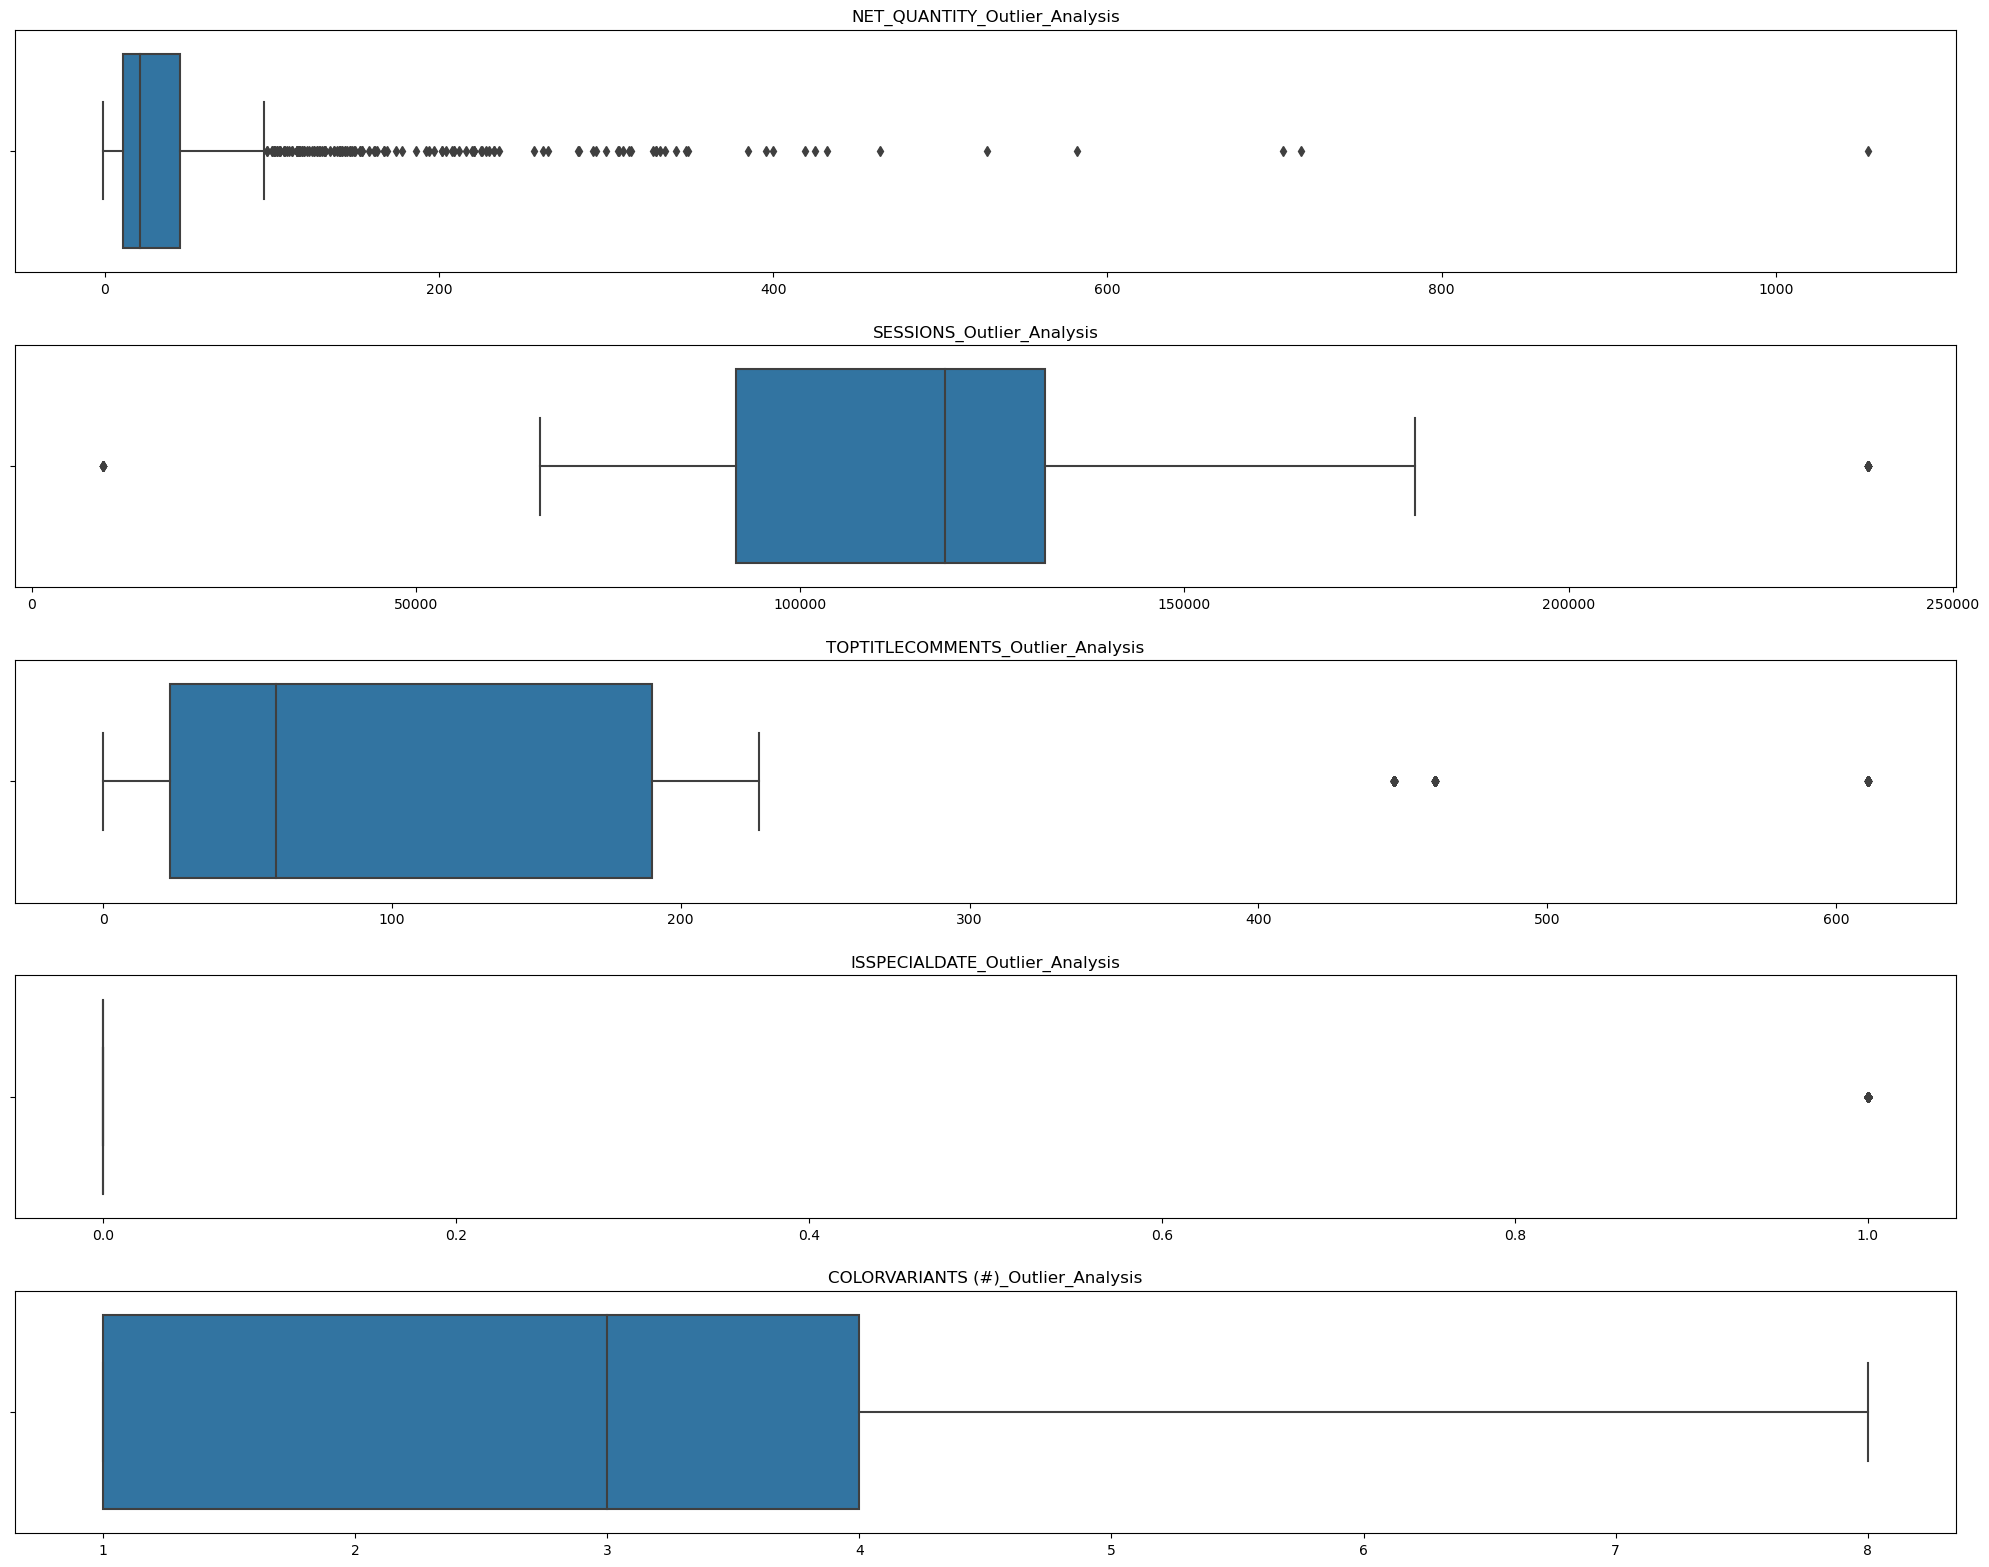

In [18]:
# Outlier Boxplot
plt.figure(figsize=(20,25))
x=1
for i in num_columns:
    plt.subplot(8,1,x)
    sns.boxplot(data=df, x=i)
    plt.xlabel(None)
    plt.title(i.upper()+"_Outlier_Analysis")
    x = x+1
    
plt.tight_layout() # Tighten the layout
plt.subplots_adjust(hspace=0.3) # Add extra space between subplots
plt.show()

In [19]:
# Outlier functions
def z_score_outliers(dataframe, col_name, threshold=3):
    mean = dataframe[col_name].mean()
    std_dev = dataframe[col_name].std()
    z_scores = (dataframe[col_name] - mean) / std_dev
    outliers = np.abs(z_scores) > threshold
    return outliers

def replace_with_z_score_thresholds(dataframe, col_name, threshold=3):
    mean = dataframe[col_name].mean()
    std_dev = dataframe[col_name].std()
    lower_limit = mean - threshold * std_dev
    upper_limit = mean + threshold * std_dev
    dataframe[col_name] = np.clip(dataframe[col_name], lower_limit, upper_limit)

# Apply putlier cap method
num_columns = df.select_dtypes(include=[np.number]).columns 
for col in num_columns:
    outliers = z_score_outliers(df, col)
    if outliers.any():
        print(f"Outliers found in column {col}.")
        replace_with_z_score_thresholds(df, col)
    else:
        print(f"No outliers found in column {col}.")

Outliers found in column net_quantity.
Outliers found in column sessions.
No outliers found in column toptitlecomments.
No outliers found in column isspecialdate.
No outliers found in column colorvariants (#).


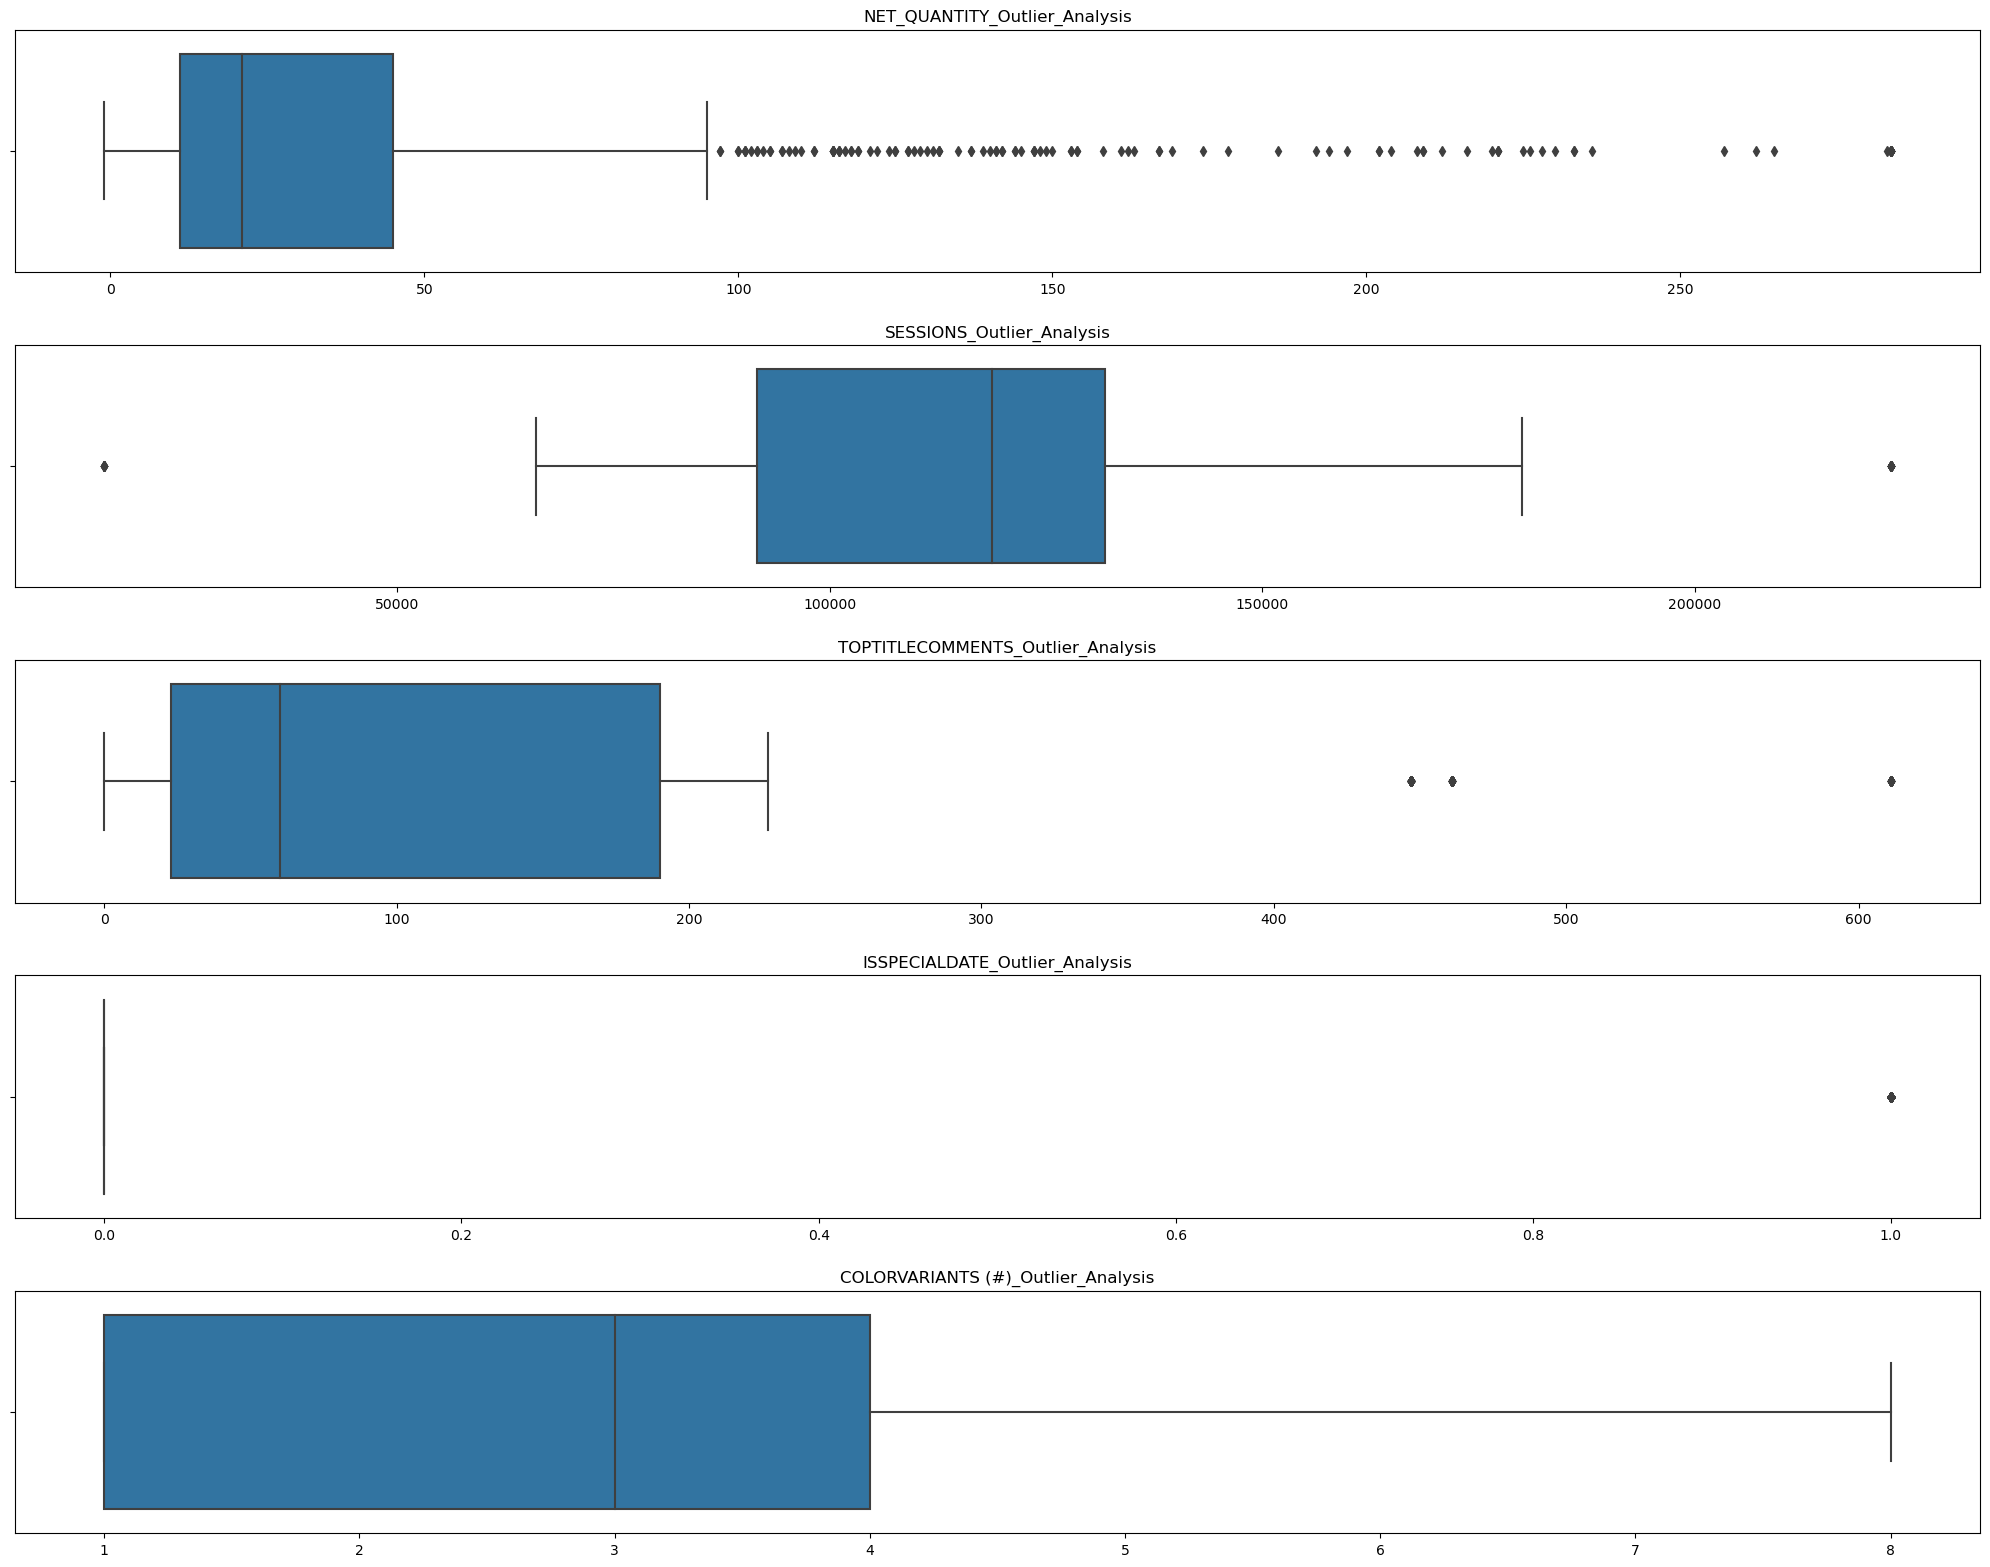

In [20]:
# After outlier cap process
plt.figure(figsize=(20,25))
x=1
for i in num_columns:
    plt.subplot(8,1,x)
    sns.boxplot(data=df, x=i)
    plt.xlabel(None)
    plt.title(i.upper()+"_Outlier_Analysis")
    x = x+1
    
plt.tight_layout() # Tighten the layout
plt.subplots_adjust(hspace=0.3) # Add extra space between subplots
plt.show()

## Missing Values

In [21]:
pd.DataFrame({"Number_of_Nulls":df.isnull().sum(),
              "Percentage_of_Nulls": "%"+ (round(df.isnull().sum()/df.shape[0]*100,2)).astype(str)})

,Number_of_Nulls,Percentage_of_Nulls
product_title,0,%0.0
week,0,%0.0
net_quantity,0,%0.0
sessions,0,%0.0
generalproducttype,0,%0.0
detailedproducttype,0,%0.0
country,0,%0.0
material,0,%0.0
washability,0,%0.0
toptitlecomments,0,%0.0


## Correlation

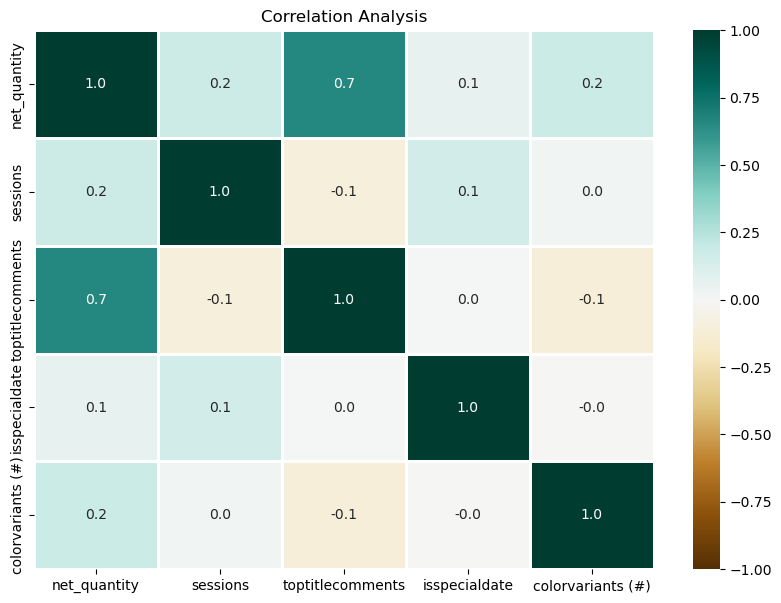

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(data = df[num_columns].corr(), cmap="BrBG", annot=True, vmin=-1, vmax=1, fmt="1.1f", annot_kws={"fontsize":10}, linewidth=1, linecolor="white" )
plt.title("Correlation Analysis")
plt.show()

## Feature Engineering 

In [23]:
# split week column
df[['year', 'week']] = df['week'].str.split('-W', expand=True)
df["year"] = df["year"].astype(int)
df["week"] = df["week"].astype(int)

# Function to convert week number and year to month number
def week_to_month(week, year):
    # Find the first day of the given year
    first_day_of_year = datetime.datetime(year, 1, 1)
    # Calculate the first day of the given week
    first_week_day = first_day_of_year + datetime.timedelta(weeks=week-1)
    return first_week_day.month

# Apply the function to the DataFrame
df['month'] = df.apply(lambda row: week_to_month(row['week'], row['year']), axis=1)
df['year_month_week'] = df['year'].astype(str) + "-" + df['month'].astype(str).str.zfill(2) + "-" + df['week'].astype(str).str.zfill(2) 
cols = ['year_month_week'] + ["year"] + ["month"] + ["week"] + [col for col in df.columns if col not in ("year_month_week", "year", "month", "week", "net_quantity")] + ["net_quantity"]
df = df[cols]

df

,year_month_week,year,month,week,product_title,sessions,generalproducttype,detailedproducttype,country,material,washability,toptitlecomments,isspecialdate,pile_height,colorvariants (#),net_quantity
0,2022-12-52,2022,12,52,product_1,16097.87,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,447,0,flatweave,1,3.00
1,2022-12-52,2022,12,52,product_2,16097.87,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,461,0,medium-pile,6,12.00
2,2022-12-52,2022,12,52,product_3,16097.87,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,447,0,flatweave,1,2.00
3,2022-12-52,2022,12,52,product_4,16097.87,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,60,0,flatweave,6,1.00
4,2022-12-52,2022,12,52,product_5,16097.87,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,70,0,medium-pile,1,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,2023-12-52,2023,12,52,product_24,149542.00,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,33,1,medium-pile,4,14.00
1118,2023-12-52,2023,12,52,product_22,149542.00,NOAK Rugs - Washable,NOAK Rugs - IN Washable,IN,wool,machine-washable,28,1,plush,1,20.00
1119,2023-12-52,2023,12,52,product_13,149542.00,NOAK Rugs - Washable,NOAK Rugs - IN Washable,IN,wool,machine-washable,70,1,plush,4,57.00
1120,2023-12-52,2023,12,52,product_11,149542.00,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,227,1,medium-pile,6,119.00


In [24]:
# Sessions column categorize
percentiles = np.percentile(df['sessions'],[25, 50, 75])
def cat_sessions(session_value, percentile) : 
    if session_value < percentiles[0]:
        return 'Low'
    elif percentiles[0] <= session_value <= percentiles[2]:
        return 'Medium'
    else:
        return 'High'
df['session_category'] = df['sessions'].apply(cat_sessions, args=(percentiles,))
df.drop('sessions', axis=1, inplace=True)
df

,year_month_week,year,month,week,product_title,generalproducttype,detailedproducttype,country,material,washability,toptitlecomments,isspecialdate,pile_height,colorvariants (#),net_quantity,session_category
0,2022-12-52,2022,12,52,product_1,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,447,0,flatweave,1,3.00,Low
1,2022-12-52,2022,12,52,product_2,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,461,0,medium-pile,6,12.00,Low
2,2022-12-52,2022,12,52,product_3,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,447,0,flatweave,1,2.00,Low
3,2022-12-52,2022,12,52,product_4,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,60,0,flatweave,6,1.00,Low
4,2022-12-52,2022,12,52,product_5,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,70,0,medium-pile,1,5.00,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,2023-12-52,2023,12,52,product_24,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,33,1,medium-pile,4,14.00,High
1118,2023-12-52,2023,12,52,product_22,NOAK Rugs - Washable,NOAK Rugs - IN Washable,IN,wool,machine-washable,28,1,plush,1,20.00,High
1119,2023-12-52,2023,12,52,product_13,NOAK Rugs - Washable,NOAK Rugs - IN Washable,IN,wool,machine-washable,70,1,plush,4,57.00,High
1120,2023-12-52,2023,12,52,product_11,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,227,1,medium-pile,6,119.00,High


In [25]:
# Classify colorVariants using mean and standard deviation
colorVariants_mean = df['colorvariants (#)'].mean()
colorVariants_std = df['colorvariants (#)'].std()

bins_colorVariants = [0, colorVariants_mean - colorVariants_std, colorVariants_mean, colorVariants_mean + colorVariants_std, df['colorvariants (#)'].max()]
labels_colorVariants = ['1', '2', '3', '3+']
df['colorvariants_category'] = pd.cut(df['colorvariants (#)'], bins=bins_colorVariants, labels=labels_colorVariants, include_lowest=True)
df.drop('colorvariants (#)', axis=1, inplace=True)
df

,year_month_week,year,month,week,product_title,generalproducttype,detailedproducttype,country,material,washability,toptitlecomments,isspecialdate,pile_height,net_quantity,session_category,colorvariants_category
0,2022-12-52,2022,12,52,product_1,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,447,0,flatweave,3.00,Low,1
1,2022-12-52,2022,12,52,product_2,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,461,0,medium-pile,12.00,Low,3+
2,2022-12-52,2022,12,52,product_3,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,447,0,flatweave,2.00,Low,1
3,2022-12-52,2022,12,52,product_4,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,60,0,flatweave,1.00,Low,3+
4,2022-12-52,2022,12,52,product_5,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,70,0,medium-pile,5.00,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,2023-12-52,2023,12,52,product_24,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,33,1,medium-pile,14.00,High,3
1118,2023-12-52,2023,12,52,product_22,NOAK Rugs - Washable,NOAK Rugs - IN Washable,IN,wool,machine-washable,28,1,plush,20.00,High,1
1119,2023-12-52,2023,12,52,product_13,NOAK Rugs - Washable,NOAK Rugs - IN Washable,IN,wool,machine-washable,70,1,plush,57.00,High,3
1120,2023-12-52,2023,12,52,product_11,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,227,1,medium-pile,119.00,High,3+


# 3-Models 

## Lag/Shifted Features 

In [26]:
df_model = df.copy()
columns_to_group_by = [col for col in df.columns if col not in ("net_quantity", "product_title", "week", "month", "year")]
df_model_columns = ["product_title", "week", "month", "year"] + columns_to_group_by + ["net_quantity"]

df_model = df[df_model_columns]
df_model

,product_title,week,month,year,year_month_week,generalproducttype,detailedproducttype,country,material,washability,toptitlecomments,isspecialdate,pile_height,session_category,colorvariants_category,net_quantity
0,product_1,52,12,2022,2022-12-52,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,447,0,flatweave,Low,1,3.00
1,product_2,52,12,2022,2022-12-52,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,461,0,medium-pile,Low,3+,12.00
2,product_3,52,12,2022,2022-12-52,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,447,0,flatweave,Low,1,2.00
3,product_4,52,12,2022,2022-12-52,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,60,0,flatweave,Low,3+,1.00
4,product_5,52,12,2022,2022-12-52,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,70,0,medium-pile,Low,1,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,product_24,52,12,2023,2023-12-52,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,33,1,medium-pile,High,3,14.00
1118,product_22,52,12,2023,2023-12-52,NOAK Rugs - Washable,NOAK Rugs - IN Washable,IN,wool,machine-washable,28,1,plush,High,1,20.00
1119,product_13,52,12,2023,2023-12-52,NOAK Rugs - Washable,NOAK Rugs - IN Washable,IN,wool,machine-washable,70,1,plush,High,3,57.00
1120,product_11,52,12,2023,2023-12-52,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,227,1,medium-pile,High,3+,119.00


In [27]:
def lag_features(dataframe, lags):
    for lag in lags:   
        dataframe['net_quantity_lag_' + str(lag)] = dataframe.groupby(["product_title"])["net_quantity"].transform(
            lambda x: x.shift(lag))
    return dataframe

In [28]:
# net_quantity_lag_1 = last week sales
# net_quantity_lag_4 = last month sales
# net_quantity_lag_13 = last 3 months sales

pd.set_option('display.max_rows', 1000)
df_model1 = lag_features(df_model, [1, 2, 3, 4, 13, 26, 52])

# apply fillna(0) columns which include "net_quantity_lag" words
for column in df_model1.columns:
    if 'net_quantity_lag' in column:
        df_model1[column] = df_model1[column].fillna(0)
        
df_model1.head(10)

,product_title,week,month,year,year_month_week,generalproducttype,detailedproducttype,country,material,washability,...,session_category,colorvariants_category,net_quantity,net_quantity_lag_1,net_quantity_lag_2,net_quantity_lag_3,net_quantity_lag_4,net_quantity_lag_13,net_quantity_lag_26,net_quantity_lag_52
0,product_1,52,12,2022,2022-12-52,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,...,Low,1,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,product_2,52,12,2022,2022-12-52,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,...,Low,3+,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,product_3,52,12,2022,2022-12-52,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,...,Low,1,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,product_4,52,12,2022,2022-12-52,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,...,Low,3+,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,product_5,52,12,2022,2022-12-52,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,...,Low,1,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,product_6,52,12,2022,2022-12-52,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,...,Low,3,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,product_7,52,12,2022,2022-12-52,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,...,Low,1,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,product_8,52,12,2022,2022-12-52,Rug Pad,NOAK Rugs - Rug Pad,US,other,non-washable,...,Low,1,16.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,product_9,52,12,2022,2022-12-52,NOAK Rugs - Washable,NOAK Rugs - TR Washable,TR,recycled-polyester,machine-washable,...,Low,3+,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,product_1,1,1,2023,2023-01-01,NOAK Rugs - Non-Washable,NOAK Rugs - IN Non-Washable,IN,jute,non-washable,...,Low,1,12.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00


## Encoding 

In [29]:
df_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   product_title           1122 non-null   object  
 1   week                    1122 non-null   int64   
 2   month                   1122 non-null   int64   
 3   year                    1122 non-null   int64   
 4   year_month_week         1122 non-null   object  
 5   generalproducttype      1122 non-null   object  
 6   detailedproducttype     1122 non-null   object  
 7   country                 1122 non-null   object  
 8   material                1122 non-null   object  
 9   washability             1122 non-null   object  
 10  toptitlecomments        1122 non-null   int64   
 11  isspecialdate           1122 non-null   int64   
 12  pile_height             1122 non-null   object  
 13  session_category        1122 non-null   object  
 14  colorvariants_category  

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# apply Label Encoder on session_category and colorvariants_category because these variables have priority.
label_encoder = LabelEncoder()

df_model1['session_category'] = label_encoder.fit_transform(df_model1['session_category'])
df_model1['colorvariants_category'] = label_encoder.fit_transform(df_model1['colorvariants_category'])

# apply One-Hot Encoding for others
df_model2 = pd.get_dummies(df_model1, columns=['product_title', 'generalproducttype', 'detailedproducttype', "country", "material", "washability", "pile_height"])
boolean_columns = df_model2.select_dtypes(include='bool').columns
df_model2[boolean_columns] = df_model2[boolean_columns].astype(int)

# Year, month, week columns are removed because they are objects.
df_model2.drop(columns = ["year", "month", "week", "year_month_week"], axis=1, inplace=True)
df_model2

,toptitlecomments,isspecialdate,session_category,colorvariants_category,net_quantity,net_quantity_lag_1,net_quantity_lag_2,net_quantity_lag_3,net_quantity_lag_4,net_quantity_lag_13,...,material_jute,material_other,material_recycled-polyester,material_wool,washability_machine-washable,washability_non-washable,pile_height_flatweave,pile_height_low-pile,pile_height_medium-pile,pile_height_plush
0,447,0,1,0,3.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,1,1,0,0,0
1,461,0,1,3,12.00,0.00,0.00,0.00,0.00,0.00,...,0,0,1,0,1,0,0,0,1,0
2,447,0,1,0,2.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,1,1,0,0,0
3,60,0,1,3,1.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,1,1,0,0,0
4,70,0,1,0,5.00,0.00,0.00,0.00,0.00,0.00,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,33,1,0,2,14.00,11.00,20.00,12.00,23.00,33.00,...,0,0,1,0,1,0,0,0,1,0
1118,28,1,0,0,20.00,16.00,14.00,5.00,20.00,8.00,...,0,0,0,1,1,0,0,0,0,1
1119,70,1,0,2,57.00,48.00,50.00,44.00,95.00,22.00,...,0,0,0,1,1,0,0,0,0,1
1120,227,1,0,3,119.00,57.00,85.00,92.00,204.00,154.00,...,0,0,1,0,1,0,0,0,1,0


## Train-Test Split 

In [31]:
from sklearn.model_selection import train_test_split

y = df_model2["net_quantity"]
X = df_model2.drop(["net_quantity"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

y_test.shape, y_train.shape

((225,), (897,))

## Classification and Regression Trees (CART)

* <b><span style="color:red" > It forms the basis of all tree methods, together with Bagging
* The aim is to transform complex structures within the data set into simple decision structures.
* Heterogeneous data sets are divided into homogeneous subgroups according to a specified target variable.
* There is a risk of overfitting, i.e. Decision trees tend to have high variance
* <b><span style="color:red" > If there is no generalizability, it is a successful model, just like estimating the salary of a department
* Each attribute creates a node. The most important attribute is placed at the root node, and the tree is descended from below. This process continues until a leaf node is reached. The leaf node contains the prediction or result of the decision tree
* ***How ​​to choose the attributes***; 1-Information Gain; We try to estimate the information contained in each attribute. If the entropy is high, there is uncertainty. The transition from high entropy to low entropy is the information gain. 2-Gini Index; As it gets closer to 1, purity (specificity) increases.

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import sklearn.metrics as mt

y = df_model2["net_quantity"]
X = df_model2.drop(["net_quantity"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

cart_model = DecisionTreeRegressor(random_state=42)
cart_model.fit(X_train, y_train)
y_pred_cart = cart_model.predict(X_test)

# Calculating performance
cart_rmse = round(mt.mean_squared_error(y_test, y_pred_cart, squared=False), 2)
cart_r2 = round(r2_score(y_test, y_pred_cart), 2)

print(f"CART RMSE: {cart_rmse}")
print(f"CART R-squared: {cart_r2}")

CART RMSE: 23.57
CART R-squared: 0.86


### Model Tuning 

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30,40],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

cart_model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=cart_model, param_grid=param_grid, cv=10, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred_cart_tuned = best_model.predict(X_test)

# Calculating performance
cart_tuned_rmse = round(mt.mean_squared_error(y_test, y_pred_cart_tuned, squared=False), 2)
cart_tuned_r2 = round(r2_score(y_test, y_pred_cart_tuned), 2)

print(f"CART Tuned RMSE: {cart_tuned_rmse}")
print(f"CART Tuned R-squared: {cart_tuned_r2}")

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
CART Tuned RMSE: 22.33
CART Tuned R-squared: 0.88


## Bagging (Bootstrap Aggregation)

* Its basis is based on the evaluation of the predictions produced by multiple decision trees created with the bootstrap (resampling) method by combining them
* Instead of a single decision tree, it tries to produce new decision trees using different data from the original data
* We reach the result by taking the average of the outputs obtained from different samples.
* <b><span style="color:red" > It tries to produce the optimal result on many decision trees, tries to minimize the variance.
* It prevents the over-learning situation in CART, **provides randomness**, and is resistant to memorization, which reduces the variance.
* <b><span style="color:red" > It forms the basis of all tree methods together with CART

In [33]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

y = df_model2["net_quantity"]
X = df_model2.drop(["net_quantity"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

base_estimator = DecisionTreeRegressor(max_depth=20, min_samples_split=10, min_samples_leaf=5)

bagging_model = BaggingRegressor(estimator=base_estimator,
                                 n_estimators=10,  # Number of base estimators
                                 random_state=42)

bagging_model.fit(X_train, y_train)

y_pred_bagg = bagging_model.predict(X_test)

# Calculating performance
bagg_rmse = round(mt.mean_squared_error(y_test, y_pred_bagg, squared=False), 2)
bagg_r2 = round(r2_score(y_test, y_pred_bagg), 2)

print(f"Bagging RMSE: {bagg_rmse}")
print(f"Bagging R-squared: {bagg_r2}")

Bagging RMSE: 18.23
Bagging R-squared: 0.92


### Model Tuning 

In [34]:
base_estimator = DecisionTreeRegressor()
bagging_model = BaggingRegressor(estimator=base_estimator, random_state=42)

param_grid = {
    'estimator__max_depth': [10, 20, 30, 40],  # Extend max_depth range
    'estimator__min_samples_split': [2, 5, 10, 15],  # Extend min_samples_split range
    'estimator__min_samples_leaf': [1, 2, 4, 8],  # Extend min_samples_leaf range
    'n_estimators': [50, 100, 150],  # Extend number of estimators
    'max_samples': [0.5, 0.7, 1.0],  # Adjust max_samples range
}

grid_search = GridSearchCV(estimator=bagging_model,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)  # Use all available cores

grid_search.fit(X_train, y_train)

# Get the best model
bagg_best_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred_bagg_tuned = bagg_best_model.predict(X_test)

# Calculating performance
bagg_tuned_rmse = round(mt.mean_squared_error(y_test, y_pred_bagg_tuned, squared=False), 2)
bagg_tuned_r2 = round(r2_score(y_test, y_pred_bagg_tuned), 2)

print(f"Bagging Tuned RMSE: {bagg_tuned_rmse}")
print(f"Bagging Tuned R-squared: {bagg_tuned_r2}")

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Bagging Tuned RMSE: 17.64
Bagging Tuned R-squared: 0.92


## Random Forest

* In the Bagging model, we reach a conclusion by taking the average of the results we get from different examples. Random Forest emerged because of why we include something with high error in the average
* <b><span style="color:red" > It creates many decision trees in the training phase and makes predictions according to the problem type. It eliminates the problems of overfitting decision trees to the training sets.
* In Bagging, errors were not weighted for each model, the average was taken.
* <b><span style="color:red" > While creating examples in Bagging, we took all the variables, but in Random Forest, we also select the variables while sampling. In other words, if there are 5 variables in the model, Random Forest also works on examples with 2,3,4 variables
* When the prediction values ​​are requested from the final prediction trees, the trees are weighted by considering the previously calculated error rates of each tree
* We examine the importance of variables with Feature Importance
* **It is one of the most successful models among Decision Trees**

In [35]:
from sklearn.ensemble import RandomForestRegressor

y = df_model2["net_quantity"]
X = df_model2.drop(["net_quantity"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_random = rf_model.predict(X_test)

# Calculating performance
random_rmse = round(mt.mean_squared_error(y_test, y_pred_random, squared=False), 2)
random_r2 = round(r2_score(y_test, y_pred_random), 2)

print(f"Random Forest RMSE: {random_rmse}")
print(f"Random Forest R-squared: {random_r2}")

Random Forest RMSE: 18.0
Random Forest R-squared: 0.92


### Model tuning

In [36]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 300,400],
    'max_depth': [3, 5, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf_model, 
                                   param_distributions=param_distributions, 
                                   n_iter=10, 
                                   scoring='r2', 
                                   cv=5, 
                                   verbose=1, 
                                   n_jobs=-1, 
                                   random_state=42)

random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_

y_pred_random_tuned = best_rf_model.predict(X_test)

# Calculating performance
random_tuned_rmse = round(mt.mean_squared_error(y_test, y_pred_random_tuned, squared=False), 2)
random_tuned_r2 = round(r2_score(y_test, y_pred_random_tuned), 2)

print(f"Random Forest Tuned RMSE: {random_tuned_rmse}")
print(f"Random Forest Tuned R-squared: {random_tuned_r2}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest Tuned RMSE: 17.69
Random Forest Tuned R-squared: 0.92


## K-Nearest Neighbors (KNN)

* <b><span style="color:red" > Predictions are made according to observation similarity.
* Tell me your friend and I will tell you who you are!
* It is a non-parametric learning type
* It cannot be said that it is very good in terms of performance in large data sets

In [37]:
from sklearn.neighbors import KNeighborsRegressor

y = df_model2["net_quantity"]
X = df_model2.drop(["net_quantity"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculating performance
knn_rmse = round(mt.mean_squared_error(y_test, y_pred_knn, squared=False), 2)
knn_r2 = round(r2_score(y_test, y_pred_knn), 2)

print(f"KNN RMSE: {knn_rmse}")
print(f"KNN R-squared: {knn_r2}")

KNN RMSE: 18.05
KNN R-squared: 0.92


### Model Tuning

In [38]:
param_grid = {
    'n_neighbors': list(range(1, 36)),  # Focusing on values around 30
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'p': [1, 2]
}

# Initialize the KNeighborsRegressor
knn = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Fit model with best params
knn_tuned = KNeighborsRegressor(**best_params)
knn_tuned.fit(X_train, y_train)

# Predict
y_pred_knn_tuned = knn_tuned.predict(X_test)

# Calculating performance
knn_tuned_rmse = round(mt.mean_squared_error(y_test, y_pred_knn_tuned, squared=False), 2)
knn_tuned_r2 = round(r2_score(y_test, y_pred_knn_tuned), 2)

print(f"KNN Tuned RMSE: {knn_tuned_rmse}")
print(f"KNN Tuned R-squared: {knn_tuned_r2}")

KNN Tuned RMSE: 17.95
KNN Tuned R-squared: 0.92


## Support Vector Regression (SVR)

* <b><span style="color:red" > The aim is to determine **straight or curved** in a way that can take the maximum point in the range of a margin with the smallest error.
* The planes that enable the drawing of the hyperplane are called support vectors. These planes help to draw the hyperplane separating the classes, provide support. The aim is to max margin with the hyperplane drawn with the help of support vectors!
* Standardization is important for SVR. It is necessary to transform the data we have standardized for the outputs back to their original state. **(scx.inverse_transform(y_pred))**
* <b><span style="color:red" > The effect of outlier observations is lower in SVR
* It can also be used for outlier detection
* We can define C as the complexity parameter, penalty parameter

In [39]:
from sklearn.svm import SVR

df_model3 = df_model2.copy()

y_svm = df_model3["net_quantity"]
X_svm = df_model3.drop(["net_quantity"], axis=1)

numeric_columns = ["toptitlecomments", "net_quantity_lag_1", "net_quantity_lag_2", "net_quantity_lag_3", "net_quantity_lag_4", "net_quantity_lag_13", "net_quantity_lag_26", "net_quantity_lag_52"]

# StandardScaler 
scaler = StandardScaler()
X_svm[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

# Create SVR model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Calculating performance
svm_rmse = round(mt.mean_squared_error(y_test, y_pred_svm, squared=False), 2)
svm_r2 = round(r2_score(y_test, y_pred_svm), 2)

print(f"SVM RMSE: {svm_rmse}")
print(f"SVM R-squared: {svm_r2}")


SVM RMSE: 48.23
SVM R-squared: 0.42


### Model Tuning

In [40]:
from sklearn.pipeline import Pipeline

df_model3 = df_model2.copy()

y_svm = df_model3["net_quantity"]
X_svm = df_model3.drop(["net_quantity"], axis=1)

numeric_columns = ["toptitlecomments", "net_quantity_lag_1", "net_quantity_lag_2", "net_quantity_lag_3", "net_quantity_lag_4", "net_quantity_lag_13", "net_quantity_lag_26", "net_quantity_lag_52"]

# create pipeline 
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler uygulama
    ('svm', SVR())                 # SVM modeli
])

# Params
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__degree': [2, 3, 4],  # Sadece 'poly' kernel için
}

# find best params with GridSearchCV 
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_svm, y_svm)

# predict with best params
best_model = grid_search.best_estimator_
y_pred_svm_tuned = best_model.predict(X_svm)

# Calculating performance
svm_tuned_rmse = round(mt.mean_squared_error(y, y_pred_svm_tuned, squared=False), 2)
svm_tuned_r2 = round(r2_score(y, y_pred_svm_tuned), 2)

print(f"SVM Tuned RMSE: {svm_tuned_rmse}")
print(f"SVM Tuned R-squared: {svm_tuned_r2}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=scale, svm__kernel=poly; total time=   0.1s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=scale, svm__kernel=poly; total time=   0.1s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=scale, svm__kernel=poly; total time=   0.1s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=scale, svm__kernel=poly; total time=   0.1s
[CV] END svm__C=0.1, svm__degree=2, svm__gamma=scale, svm__kernel=poly; total time=   0.1s
[CV] END svm__C=0.

## Artifical Neural Network (ANN)

* <b><span style="color:red" > It is one of the powerful ML algorithms that can be used for classification and regression problems that refer to the way the human brain processes information
* It is prone to overfitting
* Its main difference from other algorithms is that it has layers!
* As we can see in the formula below, it is inspired by regression, and Lasso
* <b><span style="color:red" > It is very important to standardize variables with StandardScaler beforehand

In [41]:
from sklearn.neural_network import MLPRegressor

y = df_model2["net_quantity"]
X = df_model2.drop(["net_quantity"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_model = MLPRegressor(max_iter=1000)
mlp_model.fit(X_train_scaled, y_train)

y_pred_ann = mlp_model.predict(X_test_scaled)

# Calculating performance
ann_rmse = round(mt.mean_squared_error(y_test, y_pred_ann, squared=False), 2)
ann_r2 = round(r2_score(y_test, y_pred_ann), 2)

print(f"ANN RMSE: {ann_rmse}")
print(f"ANN R-squared: {ann_r2}")

ANN RMSE: 15.26
ANN R-squared: 0.94


### Model Tuning

In [42]:
mlp_params = {"alpha":[0.1,0.01,0.02,0.005],
              "hidden_layer_sizes":[(20,20),(100,50,150),(300,200,150)],
              "activation":["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=10)
mlp_cv_model.fit(X_train_scaled, y_train)
best_params = mlp_cv_model.best_params_

# create model with best params
mlp_tuned = MLPRegressor(**best_params, max_iter=1000)
mlp_tuned.fit(X_train_scaled, y_train)

# predict
y_pred_ann_tuned = mlp_tuned.predict(X_test_scaled)

# Calculating performance
ann_tuned_rmse = round(mt.mean_squared_error(y_test, y_pred_ann_tuned, squared=False), 2)
ann_tuned_r2 = round(r2_score(y_test, y_pred_ann_tuned), 2)

print(f"ANN Tuned RMSE: {ann_tuned_rmse}")
print(f"ANN Tuned R-squared: {ann_tuned_r2}")

ANN Tuned RMSE: 16.53
ANN Tuned R-squared: 0.93


## Gradient Boosting Machines (GBM)

* **Boosting ;** is based on the idea of ​​bringing together weak students and creating a strong student. (Boost = to revive, to increase)
* **Adaptive Boosting (AdaBoost) ;** is an algorithm that brings to life the idea of ​​weak classifiers coming together to create a strong classifier.
* <b><span style="color:red" > In Bagging, the trees were independent from each other, but in Boosting, there is a dependency of the trees.
* **GBM ;** is a generalized version of AdaBoost that can be easily adapted to classification and regression problems
* A model in the series is created by building (fit) on the errors (residuals) of the previous model in the series

In [43]:
y = df_model2["net_quantity"]
X = df_model2.drop(["net_quantity"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)

# Calculating performance
gbm_rmse = round(mt.mean_squared_error(y_test, y_pred_gbm, squared=False), 2)
gbm_r2 = round(r2_score(y_test, y_pred_gbm), 2)

print(f"GBM RMSE: {gbm_rmse}")
print(f"GBM R-squared: {gbm_r2}")

GBM RMSE: 16.1
GBM R-squared: 0.94


### Model Tuning 

In [44]:
gbm_params = {"n_estimators" : [100, 200, 500],
              "learning_rate" : [0.1, 0.01, 0.001],
              "max_depth" : [3, 5, 8],
              "min_samples_split" : [2, 5, 10],
              "min_samples_leaf" : [1, 2, 4]}

gbm = GradientBoostingRegressor(random_state=42)
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=5, n_jobs=-1, verbose=2)
gbm_cv_model.fit(X_train, y_train)

best_params = gbm_cv_model.best_params_

# create model with best params
gbm_tuned = GradientBoostingRegressor(random_state=42, **best_params)
gbm_tuned.fit(X_train, y_train)

# Predict
y_pred_gbm_tuned = gbm_tuned.predict(X_test)

# Calculating performance
gbm_tuned_rmse = round(mt.mean_squared_error(y_test, y_pred_gbm_tuned, squared=False), 2)
gbm_tuned_r2 = round(r2_score(y_test, y_pred_gbm_tuned), 2)

print(f"GBM Tuned RMSE: {gbm_tuned_rmse}")
print(f"GBM Tuned R-squared: {gbm_tuned_r2}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

* n_estimators: This controls the number of boosting stages (decision trees) used in the ensemble. Higher values can lead to better performance but also increase training time and risk overfitting. Start with a moderate value and adjust based on grid search results.
* learning_rate: This controls the step size in each iteration of the boosting process. Smaller values lead to more conservative updates and can prevent overfitting, but they also require more iterations.
* max_depth: This controls the maximum depth of the individual regression trees in the ensemble. Deeper trees can capture more complex relationships but can also be prone to overfitting. Experiment with different values.
* min_samples_split: This sets the minimum number of samples required to split an internal node in the decision trees. Higher values can prevent overfitting on small datasets, while lower values can make the model more flexible.
* min_samples_leaf: This sets the minimum number of samples required at each leaf node in the decision trees. Higher values can reduce variance but can also lead to underfitting, especially on small datasets.


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

## Extreme Gradient Boosting (XGBoost)

* It is a scalable and integrable version of GBM that is optimized to increase speed and prediction performance.

* It is currently one of the most popular algorithms

* It can be used with R, Python, Hadoop, Scala, Julia

* It is scalable

* <b><span style="color:red" > It is fast

* <b><span style="color:red" > It has high prediction success

* It has proven its success in many competitions

* If we use XGBoost's own data structure instead of using Pandas dataframe or numpy array, more performance results are obtained. (**DMatrix()**)

In [45]:
import xgboost as xgb
from xgboost import XGBRegressor

y = df_model2["net_quantity"]
X = df_model2.drop(["net_quantity"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# convert data types to XGBoost data types
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculating performance
xgboost_rmse = round(mt.mean_squared_error(y_test, y_pred_xgb, squared=False), 2)
xgboost_r2 = round(r2_score(y_test, y_pred_xgb), 2)

print(f"XGBoost RMSE: {xgboost_rmse}")
print(f"XGBoost R-squared: {xgboost_r2}")

XGBoost RMSE: 18.66
XGBoost R-squared: 0.91


### Model Tuning 

In [46]:
xgb = XGBRegressor(random_state=42)

parametreler = {"learning_rate":[0.1, 0.01, 0.03],
                "n_estimators":[100, 200, 300],
                'colsample_bytree': [0.5, 0.7, 1],
                'subsample': [0.5, 0.7, 1],
                "max_depth":[3, 5, 8],
                'min_child_weight': [1, 3, 5],
                'gamma': [0, 0.1, 0.5],
                }

xgb_cv = GridSearchCV(xgb, param_grid=parametreler, cv=5, n_jobs=-1, verbose=2)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_

xgb_tuned = XGBRegressor(random_state = 42, **best_params)

xgb_tuned.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Calculating performance
xgboost_tuned_rmse = round(mt.mean_squared_error(y_test, y_pred_xgb_tuned, squared=False), 2)
xgboost_tuned_r2 = round(r2_score(y_test, y_pred_xgb_tuned), 2)

print(f"XGBoost Tuned RMSE: {xgboost_tuned_rmse}")
print(f"XGBoost Tuned R-squared: {xgboost_tuned_r2}")

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3

* learning_rate (eta): Controls the step size during gradient boosting.
* max_depth: Maximum depth of a tree. 
* min_child_weight: Minimum sum of hessians required for a child node split.
* gamma: Minimum loss reduction required for a split.
* subsample: Proportion of data points used for training each tree.
* colsample_bytree: Proportion of features used for training each tree.
* n_estimators: Number of boosting stages to perform. Start with a low value like 100 and increase gradually.

## LightGBM

* Another GBM type developed to increase XGBoost's training time performance.
* Developed by Microsoft
* More efficient
* Leaf-wise growth strategy instead of level-wise growth strategy
* Depth-first search (DFS) instead of breadth-first search (BFS)

In [37]:
from lightgbm import LGBMRegressor

y = df_model2["net_quantity"]
X = df_model2.drop(["net_quantity"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create the LGBMRegressor model
lgb_model = LGBMRegressor(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lightgbm = lgb_model.predict(X_test)

# Calculating performance
lightgbm_rmse = round(mt.mean_squared_error(y_test, y_pred_lightgbm, squared=False), 2)
lightgbm_r2 = round(r2_score(y_test, y_pred_lightgbm), 2)

print(f"LightGBM RMSE: {lightgbm_rmse}")
print(f"LightGBM R-squared: {lightgbm_r2}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 897, number of used features: 53
[LightGBM] [Info] Start training from score 43.167497
LightGBM RMSE: 16.75
LightGBM R-squared: 0.93


# 4-Evaluation 

In [49]:
# All results
results = {
    "Model": ["Classification and Regression Trees (CART)", "Bagging (Bootstrap Aggregation)", "Random Forest", "K-Nearest Neighbors (KNN)", "Support Vector Regression (SVR)", "Artifical Neural Network (ANN)", "Gradient Boosting Machines (GBM)", "Extreme Gradient Boosting (XGBoost)", "LightGBM"],
    "RMSE": [cart_rmse, bagg_rmse, random_rmse, knn_rmse, svm_rmse, ann_rmse, gbm_rmse, xgboost_rmse, lightgbm_rmse],
    "R-squared": [cart_r2, bagg_r2, random_r2, knn_r2, svm_r2, ann_r2, gbm_r2, xgboost_r2, lightgbm_r2],
    "Tuned RMSE": [cart_tuned_rmse, bagg_tuned_rmse, random_tuned_rmse, knn_tuned_rmse, svm_tuned_rmse, ann_tuned_rmse, gbm_tuned_rmse, xgboost_tuned_rmse, lightgbm_tuned_rmse],
    "Tuned R-squared": [cart_tuned_r2, bagg_tuned_r2, random_tuned_r2, knn_tuned_r2, svm_tuned_r2, ann_tuned_r2, gbm_tuned_r2, xgboost_tuned_r2, lightgbm_tuned_r2]
}

results_df = pd.DataFrame(results)
results_df

,Model,RMSE,R-squared,Tuned RMSE,Tuned R-squared
0,Classification and Regression Trees (CART),22.88,0.87,22.33,0.88
1,Bagging (Bootstrap Aggregation),18.23,0.92,17.64,0.92
2,Random Forest,18.00,0.92,17.69,0.92
3,K-Nearest Neighbors (KNN),18.05,0.92,17.95,0.92
4,Support Vector Regression (SVR),48.23,0.42,18.64,0.90
5,Artifical Neural Network (ANN),15.26,0.94,16.53,0.93
6,Gradient Boosting Machines (GBM),16.10,0.94,16.56,0.93
7,Extreme Gradient Boosting (XGBoost),18.66,0.91,16.59,0.93
8,LightGBM,16.75,0.93,15.92,0.94


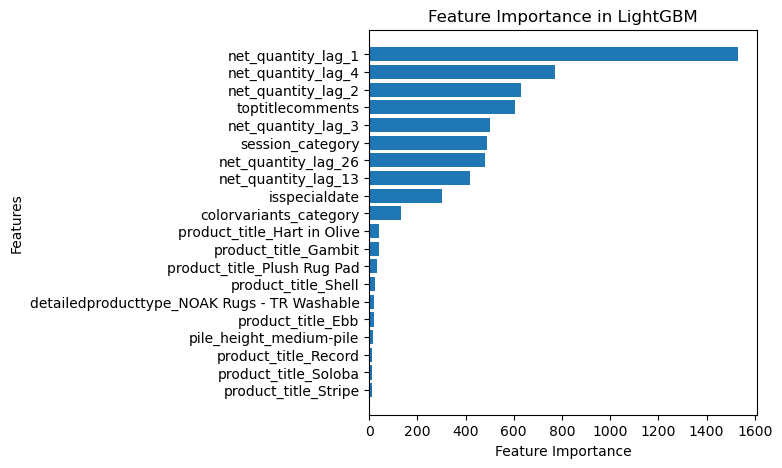

In [50]:
# Feature Importance with LightGBM
feature_importances = lgb_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Get feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(5, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in LightGBM')
plt.gca().invert_yaxis()
plt.show()

# 5-PCA

* It helps to reduce the number of independent variables we have
* <b><span style="color:red" > While trying to minimize the number of variables, we try to keep the explained variance rate (the information we will get from the data) at the maximum
* Explained Variance Rate = the information rate carried by the variables

In [64]:
# there are 56 features 
X_train.shape

(897, 56)

[ 19.61230855  36.63862804  46.95634806  52.75227013  56.02928327
  58.90003506  61.27950918  63.32931943  65.25096659  67.14013877
  69.02353983  70.89775239  72.77005125  74.64117645  76.50907413
  78.37594555  80.24044946  82.10141644  83.95940899  85.81550729
  87.66691476  89.50920173  91.33645645  93.16167768  94.98096801
  96.51596507  97.99637232  99.05302786  99.36136998  99.60798712
  99.81930433  99.94503188 100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.        ]


Text(0, 0.5, 'Explained_Variance_Ratio')

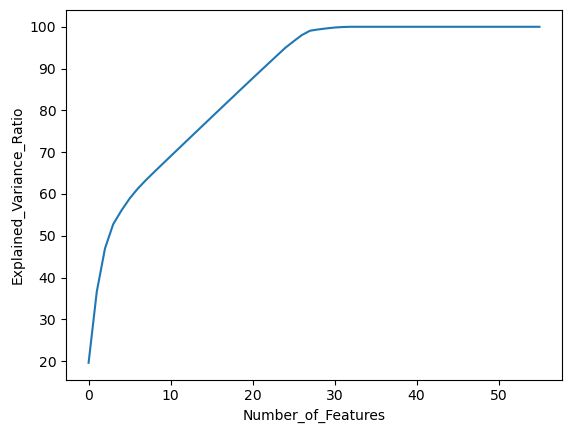

In [32]:
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA

pca = PCA()
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

print(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel("Number_of_Features")
plt.ylabel("Explained_Variance_Ratio")

Number of features that account for 95% variance = 26
[19.61230855 36.63862804 46.95634806 52.75227013 56.02928327 58.90003506
 61.27950918 63.32931943 65.25096659 67.14013877 69.02353983 70.89775239
 72.77005125 74.64117645 76.50907413 78.37594555 80.24044946 82.10141644
 83.95940899 85.81550729 87.66691476 89.50920173 91.33645645 93.16167768
 94.98096801 96.51596507]


Text(0, 0.5, 'Explained_Variance_Ratio')

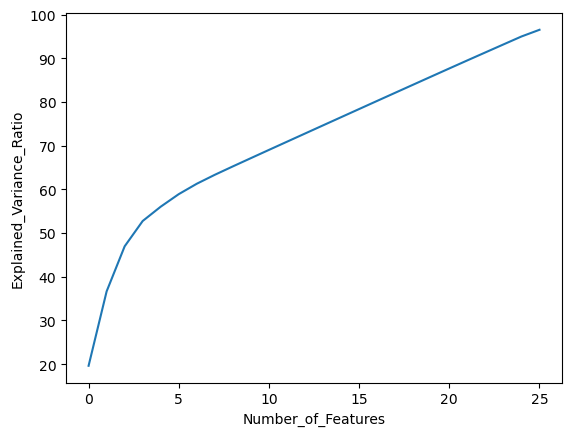

In [33]:
pca = PCA(0.95) # %95 information, %95 variation
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

print("Number of features that account for 95% variance =", X_train_pca.shape[1])
print(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel("Number_of_Features")
plt.ylabel("Explained_Variance_Ratio")

In [38]:
lgb_model = LGBMRegressor(random_state=42)

# we take PCA variables instead of all variables
lgb_model.fit(X_train_pca, y_train)
y_pred_lightgbm_pca = lgb_model.predict(X_test_pca)

# Calculate performance
lightgbm_pca_rmse = round(mt.mean_squared_error(y_test, y_pred_lightgbm_pca, squared=False), 2)
lightgbm_pca_r2 = round(r2_score(y_test, y_pred_lightgbm_pca), 2)

print(f"PCA LightGBM RMSE: {lightgbm_pca_rmse}")
print(f"PCA LightGBM R-squared: {lightgbm_pca_r2}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 897, number of used features: 26
[LightGBM] [Info] Start training from score 43.167497
PCA LightGBM RMSE: 23.71
PCA LightGBM R-squared: 0.86
